In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing

In [2]:
df = pd.read_csv('churn_modelling.csv')

# Cleaning

In [3]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True) #not relevant features

In [4]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

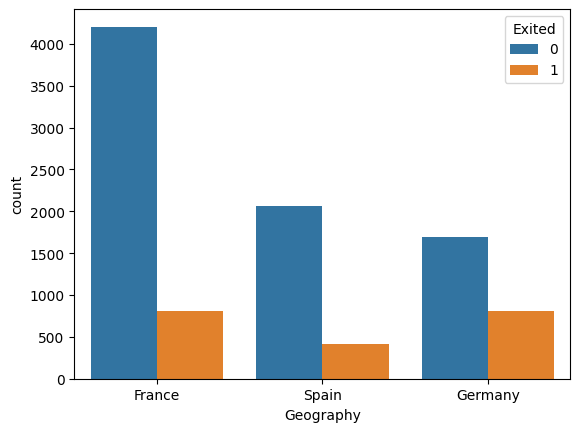

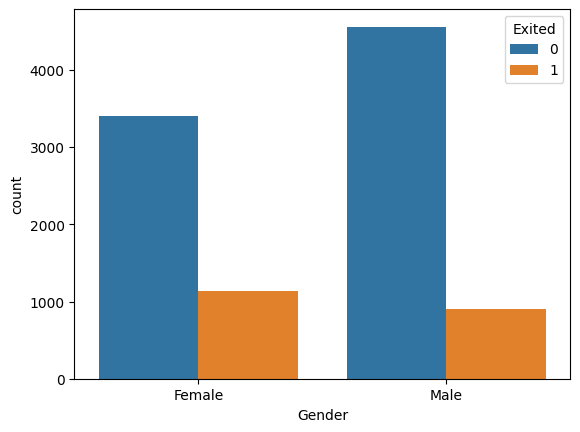

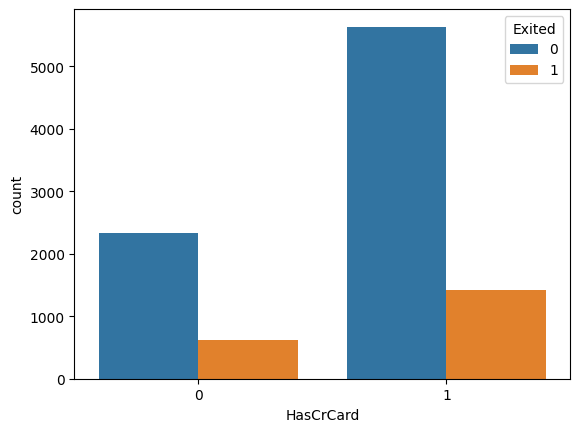

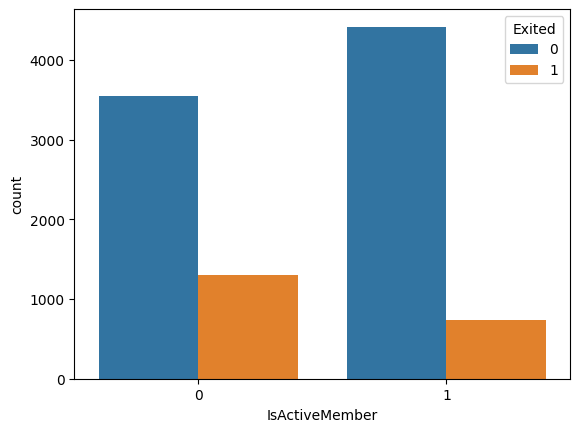

In [6]:
## Categorical Features vs Target Variable
sns.countplot(x='Geography',data=df,hue='Exited')
plt.show()
sns.countplot(x='Gender',data=df,hue='Exited')
plt.show()
sns.countplot(x='HasCrCard',data=df,hue='Exited')
plt.show()
sns.countplot(x='IsActiveMember',data=df,hue='Exited')
plt.show()

# Separating the feature and target variable

In [7]:
X=df.drop('Exited',axis=1) #all except exited
y=df.pop('Exited') #exited only

X, y

(      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0             619    France  Female   42       2       0.00              1   
 1             608     Spain  Female   41       1   83807.86              1   
 2             502    France  Female   42       8  159660.80              3   
 3             699    France  Female   39       1       0.00              2   
 4             850     Spain  Female   43       2  125510.82              1   
 ...           ...       ...     ...  ...     ...        ...            ...   
 9995          771    France    Male   39       5       0.00              2   
 9996          516    France    Male   35      10   57369.61              1   
 9997          709    France  Female   36       7       0.00              1   
 9998          772   Germany    Male   42       3   75075.31              2   
 9999          792    France  Female   28       4  130142.79              1   
 
       HasCrCard  IsActiveMember  EstimatedSalary 

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=5)
print("X_train size is {}".format(X_train.shape[0]))
print("X_val size is {}".format(X_val.shape[0]))
print("X_test size is {}".format(X_test.shape[0]))

X_train size is 8100
X_val size is 900
X_test size is 1000


In [9]:
## Standardising the train, Val and Test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

num_cols=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

num_subset=scaler.fit_transform(X_train[num_cols])

X_train_num_df=pd.DataFrame(num_subset,columns=num_cols)


X_train_num_df['Geography']=list(X_train['Geography'])
X_train_num_df['Gender']=list(X_train['Gender'])
X_train_num_df['HasCrCard']=list(X_train['HasCrCard'])
X_train_num_df['IsActiveMember']=list(X_train['IsActiveMember'])
X_train_num_df.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  EstimatedSalary  \
0    -1.178587 -1.041960 -1.732257  0.198686       0.820905         1.560315   
1    -0.380169 -1.326982  1.730718 -0.022020      -0.907991        -0.713592   
2    -0.349062  1.808258 -0.693364  0.681178       0.820905        -1.126515   
3     0.625629  2.378302 -0.347067 -1.229191       0.820905        -1.682740   
4    -0.203895 -1.136967  1.730718  0.924256      -0.907991         1.332535   

  Geography  Gender  HasCrCard  IsActiveMember  
0    France    Male          1               1  
1     Spain  Female          1               0  
2   Germany  Female          1               0  
3    France    Male          1               1  
4     Spain    Male          1               1

In [10]:
## Standardise the Validation data
num_subset=scaler.fit_transform(X_val[num_cols])
X_val_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_val_num_df['Geography']=list(X_val['Geography'])
X_val_num_df['Gender']=list(X_val['Gender'])
X_val_num_df['HasCrCard']=list(X_val['HasCrCard'])
X_val_num_df['IsActiveMember']=list(X_val['IsActiveMember'])

In [11]:
## Standardise the Test data
num_subset=scaler.fit_transform(X_test[num_cols])
X_test_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_test_num_df['Geography']=list(X_test['Geography'])
X_test_num_df['Gender']=list(X_test['Gender'])
X_test_num_df['HasCrCard']=list(X_test['HasCrCard'])
X_test_num_df['IsActiveMember']=list(X_test['IsActiveMember'])

In [12]:
## Convert the categorical features to numerical
X_train_num_df = pd.get_dummies(X_train_num_df, columns=['Geography', 'Gender']).astype(int)
X_test_num_df = pd.get_dummies(X_test_num_df, columns=['Geography', 'Gender']).astype(int)
X_val_num_df = pd.get_dummies(X_val_num_df, columns=['Geography', 'Gender']).astype(int)

X_train_num_df.head()

CreditScore  Age  Tenure  Balance  NumOfProducts  EstimatedSalary  \
0           -1   -1      -1        0              0                1   
1            0   -1       1        0              0                0   
2            0    1       0        0              0               -1   
3            0    2       0       -1              0               -1   
4            0   -1       1        0              0                1   

   HasCrCard  IsActiveMember  Geography_France  Geography_Germany  \
0          1               1                 1                  0   
1          1               0                 0                  0   
2          1               0                 0                  1   
3          1               1                 1                  0   
4          1               1                 0                  0   

   Geography_Spain  Gender_Female  Gender_Male  
0                0              0            1  
1                1              1            0  
2                0              1            0  
3                0              0            1  
4                1              0            1

# Initialize & build the model


In [13]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(7,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
import tensorflow as tf
optimizer=tf.keras.optimizers.Adam(0.01)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [15]:
model.fit(X_train_num_df,y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
810/810 [==============================] - 3s 3ms/step - loss: 0.4307 - accuracy: 0.8214
Epoch 2/100
810/810 [==============================] - 2s 3ms/step - loss: 0.4064 - accuracy: 0.8421
Epoch 3/100
810/810 [==============================] - 2s 3ms/step - loss: 0.4021 - accuracy: 0.8435
Epoch 4/100
810/810 [==============================] - 2s 3ms/step - loss: 0.4012 - accuracy: 0.8438
Epoch 5/100
810/810 [==============================] - 3s 3ms/step - loss: 0.4013 - accuracy: 0.8442
Epoch 6/100
810/810 [==============================] - 2s 3ms/step - loss: 0.4007 - accuracy: 0.8462
Epoch 7/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3993 - accuracy: 0.8448
Epoch 8/100
810/810 [==============================] - 2s 2ms/step - loss: 0.4002 - accuracy: 0.8453
Epoch 9/100
810/810 [==============================] - 2s 2ms/step - loss: 0.3985 - accuracy: 0.8441
Epoch 10/100
810/810 [==============================] - 2s 2ms/step - loss: 0.3980 - accura

810/810 [==============================] - 2s 3ms/step - loss: 0.3895 - accuracy: 0.8489
Epoch 82/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3895 - accuracy: 0.8480
Epoch 83/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3884 - accuracy: 0.8481
Epoch 84/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3896 - accuracy: 0.8485
Epoch 85/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3894 - accuracy: 0.8468
Epoch 86/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3893 - accuracy: 0.8477
Epoch 87/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3892 - accuracy: 0.8483
Epoch 88/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3900 - accuracy: 0.8483
Epoch 89/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3897 - accuracy: 0.8483
Epoch 90/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3891 - accuracy: 

In [16]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. 
# So we will use the cutoff value 0.5 to indicate whether they are likely to exit or not.
y_pred_val=model.predict(X_val_num_df)
y_pred_val[y_pred_val>0.5]=1
y_pred_val[y_pred_val <0.5]=0     

29/29 [==============================] - 0s 2ms/step


In [17]:
y_pred_val=y_pred_val.tolist()
X_compare_val=X_val.copy()
X_compare_val['y_actual']=y_val
X_compare_val['y_pred']=y_pred_val
X_compare_val.head(10)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
340           642   Germany  Female   40       6  129502.49              2   
8622          706   Germany    Male   36       9   58571.18              2   
8401          535     Spain    Male   58       1       0.00              2   
4338          714     Spain    Male   25       2       0.00              1   
8915          606    France    Male   36       1  155655.46              1   
2624          605     Spain  Female   29       3  116805.82              1   
2234          720    France  Female   38      10       0.00              2   
349           582    France    Male   39       5       0.00              2   
3719          850    France  Female   62       1  124678.35              1   
2171          526   Germany    Male   58       9  190298.89              2   

      HasCrCard  IsActiveMember  EstimatedSalary  y_actual y_pred  
340           0               1         86099.23         1  [0.0]  
8622          1               0         40774.01         0  [0.0]  
8401          1               1         11779.98         1  [0.0]  
4338          1               1        132979.43         0  [0.0]  
8915          1               1        192387.51         1  [0.0]  
2624          0               0          4092.75         0  [0.0]  
2234          1               1         56229.72         1  [0.0]  
349           1               1        129892.93         0  [0.0]  
3719          1               0         70916.00         1  [1.0]  
2171          1               1        191263.76         0  [0.0]

In [18]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_val,y_pred_val)
cm1

array([[697,  19],
       [119,  65]], dtype=int64)

In [19]:
accuracy_model1 = ((cm1[0][0]+cm1[1][1])*100)/(cm1[0][0]+cm1[1][1]+cm1[0][1]+cm1[1][0])
print (accuracy_model1, '% of testing data was classified correctly')

84.66666666666667 % of testing data was classified correctly


In [20]:
loss1,accuracy1=model.evaluate(X_train_num_df,y_train,verbose=False)
loss2,accuracy2=model.evaluate(X_val_num_df,y_val,verbose=False)
print("Train Loss {}".format(loss1))
print("Train Accuracy {}".format(accuracy1))
print("Val Loss {}".format(loss2))
print("Val Accuracy {}".format(accuracy2))

Train Loss 0.38770467042922974
Train Accuracy 0.8506172895431519
Val Loss 0.40782245993614197
Val Accuracy 0.846666693687439


In [21]:
from sklearn import metrics
y_pred_test=model.predict(X_test_num_df)
y_pred_test[y_pred_test>0.5]=1
y_pred_test[y_pred_test <0.5]=0

32/32 [==============================] - 0s 3ms/step


In [22]:
cm_test=metrics.confusion_matrix(y_test,y_pred_test)
print("Test Confusion Matrix")
cm_test

Test Confusion Matrix


array([[776,  18],
       [130,  76]], dtype=int64)

In [23]:
loss3,accuracy3=model.evaluate(X_test_num_df,y_test,verbose=False)
print("Test Accuracy is {}".format(accuracy3))
print("Test loss is {}".format(loss3))

Test Accuracy is 0.8519999980926514
Test loss is 0.395613431930542
